In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import os
import pyodbc

In [274]:
conexion = pyodbc.connect('Driver={SQL Server};'
'Server=DESKTOP-34T1EIQ;'
'Database=RepuestosWeb;'
'Trusted_Connection=yes;', timeout=5000)

## Primera Vista

In [275]:
df_VW_CantidadCotizacionEncimaPromedio=pd.read_sql("select * from VW_CantidadCotizacionEncimaPromedio", conexion)
df_VW_CantidadCotizacionEncimaPromedio.head(5)


,ID_Categoria,ID_Parte,Ciudad,TotalEncimaPromedio
0,1626,ABPDG1003V6,Jackson,0
1,1124,668ADJUST,Honolulu,0
2,1159,AC1038109,Miami,1
3,1093,225TEMP999,Charlotte,1
4,147,*661MISC,Houston,0


In [276]:
#x=dependientes
x1=df_VW_CantidadCotizacionEncimaPromedio.iloc[:, 0:3].values
#y=independientes
y1=df_VW_CantidadCotizacionEncimaPromedio.iloc[:,-1].values
#esto se vuelve un arreglo
x1

array([[1626, 'ABPDG1003V6', 'Jackson'],
       [1124, '668ADJUST', 'Honolulu'],
       [1159, 'AC1038109', 'Miami'],
       ...,
       [10442, 'ALY01540U45-ORIG.REC', 'El Paso'],
       [10448, 'ALY01573U10U1-ORIG.REC', 'Las Vegas'],
       [10467, 'ALY01578U50', 'Arlington']], dtype=object)

In [277]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x1[:,0] = le.fit_transform(x1[:,0])
x1[:,1] = le.fit_transform(x1[:,1])
x1[:,2] = le.fit_transform(x1[:,2])
x1

array([[1418, 616, 39],
       [974, 223, 36],
       [1006, 1272, 53],
       ...,
       [9107, 12133, 26],
       [9108, 12190, 43],
       [9115, 12195, 4]], dtype=object)

In [278]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.20, random_state=0)


In [279]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train1,y_train1)

GaussianNB()

In [280]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred1 = classifier.predict(x_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [281]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test1, y_pred1) #crea la matriz de confucion 
ac1 = accuracy_score(y_test1,y_pred1) #define la presicion

In [282]:
cm1

array([[2264,    0],
       [ 194,    0]], dtype=int64)

In [283]:
ac1

0.9210740439381611

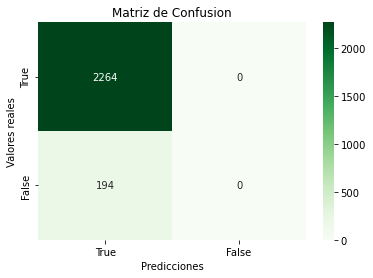

In [284]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm1,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz

## Segunda Vista 

In [285]:
dfVW_CantidadPartesEncimaPromedio=pd.read_sql("select * from VW_CantidadPartesEncimaPromedio", conexion)
dfVW_CantidadPartesEncimaPromedio.head(5)

,NombreCiudad,Genero,ID_Parte,ID_Categoria,TotalCantidadEncimaPromedio
0,San Diego,M,AC1100173CORE-ORIG.REC,1612,0
1,Tacoma,F,AC1320108-ORIG.REC,2827,0
2,Akron,M,AC1228119-ORIG.REC,3154,0
3,Richmond,M,AC1217107,3225,0
4,Dallas,F,AC2519105-ORIG.REC,4241,0


In [286]:
#x=dependientes
x2=dfVW_CantidadPartesEncimaPromedio.iloc[:, 0:4].values
#y=independientes
y2=dfVW_CantidadPartesEncimaPromedio.iloc[:,-1].values
#esto se vuelve un arreglo
x2

array([['San Diego', 'M', 'AC1100173CORE-ORIG.REC', 1612],
       ['Tacoma', 'F', 'AC1320108-ORIG.REC', 2827],
       ['Akron', 'M', 'AC1228119-ORIG.REC', 3154],
       ...,
       ['Tacoma', 'M', 'ALY01608U', 9394],
       ['Bakersfield', 'F', 'ALY01610U55U1', 10049],
       ['Greensboro', 'F', 'ALY01618U10U1', 10026]], dtype=object)

In [287]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x2[:,0] = le.fit_transform(x2[:,0])
x2[:,1] = le.fit_transform(x2[:,1])
x2[:,2] = le.fit_transform(x2[:,2])
x2[:,3] = le.fit_transform(x2[:,3])
x2

array([[76, 1, 3, 1089],
       [87, 0, 159, 2120],
       [0, 1, 78, 2421],
       ...,
       [87, 1, 11895, 5359],
       [8, 0, 11898, 5705],
       [34, 0, 11900, 5692]], dtype=object)

In [288]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.20, random_state=0)


In [289]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train2,y_train2)

GaussianNB()

In [290]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred2 = classifier.predict(x_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [291]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test2, y_pred2) #crea la matriz de confucion 
ac2 = accuracy_score(y_test2,y_pred2) #define la presicion

In [292]:
cm2

array([[2178,    0],
       [ 204,    0]], dtype=int64)

In [293]:
ac2

0.9143576826196473

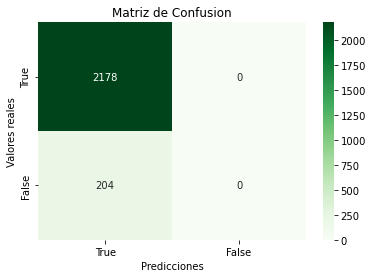

In [294]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm2,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz

## Tercera Vista 

In [295]:
dfVW_PorcentajeDescuentoEncimaPromedio=pd.read_sql("select * from VW_PorcentajeDescuentoEncimaPromedio", conexion)
dfVW_PorcentajeDescuentoEncimaPromedio.head(5)

,ID_Parte,ID_Categoria,Nombre,TotalEncimaPromedio
0,AC1183100,1511,Spokane,1
1,AC2502112N,1831,Colorado,1
2,AC1200121,2080,Tulsa,1
3,222ADJUST,6,Memphis,0
4,AC1000148U-ORIG.REC,1235,Milwaukee,1


In [296]:
#x=dependientes
x3=dfVW_PorcentajeDescuentoEncimaPromedio.iloc[:, 0:3].values
#y=independientes
y3=dfVW_PorcentajeDescuentoEncimaPromedio.iloc[:,-1].values
#esto se vuelve un arreglo
x3

array([['AC1183100', 1511, 'Spokane'],
       ['AC2502112N', 1831, 'Colorado'],
       ['AC1200121', 2080, 'Tulsa'],
       ...,
       ['ALY01667U45', 9053, 'Tacoma'],
       ['ALY01718U10', 10675, 'Stockton'],
       ['ALY01681U10U1', 10420, 'San Jose']], dtype=object)

In [297]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x3[:,0] = le.fit_transform(x3[:,0])
x3[:,1] = le.fit_transform(x3[:,1])
x3[:,2] = le.fit_transform(x3[:,2])
x3

array([[1043, 981, 82],
       [1632, 1199, 18],
       [1084, 1380, 91],
       ...,
       [12385, 6538, 87],
       [12412, 7536, 86],
       [12397, 7395, 78]], dtype=object)

In [298]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3, test_size=0.20, random_state=0)

In [299]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train3,y_train3)

GaussianNB()

In [300]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred3 = classifier.predict(x_test3)
y_pred3

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [301]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(y_test3, y_pred3) #crea la matriz de confucion 
ac3 = accuracy_score(y_test3,y_pred3) #define la presicion

In [302]:
cm3 

array([[   0, 1021],
       [   0, 1464]], dtype=int64)

In [303]:
ac3

0.5891348088531188

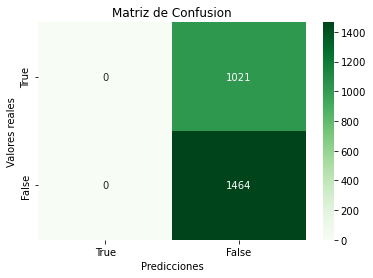

In [304]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm3,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz


In [305]:
dfVW_PorcentaEncimaPromedio=pd.read_sql("select * from VW_PorcentaEncimaPromedio", conexion)
dfVW_PorcentaEncimaPromedio.head(5)

,ID_Parte,ID_Categoria,Nombre,TotalEncimaPromedio
0,AC1183100,1511,Spokane,1
1,AC2502112N,1831,Colorado,1
2,AC1200121,2080,Tulsa,1
3,222ADJUST,6,Memphis,0
4,AC1000148U-ORIG.REC,1235,Milwaukee,1


In [306]:
#x=dependientes
x3=dfVW_PorcentaEncimaPromedio.iloc[:, 0:3].values
#y=independientes
y3=dfVW_PorcentaEncimaPromedio.iloc[:,-1].values
#esto se vuelve un arreglo
x3

array([['AC1183100', 1511, 'Spokane'],
       ['AC2502112N', 1831, 'Colorado'],
       ['AC1200121', 2080, 'Tulsa'],
       ...,
       ['ALY01667U45', 9053, 'Tacoma'],
       ['ALY01718U10', 10675, 'Stockton'],
       ['ALY01681U10U1', 10420, 'San Jose']], dtype=object)

In [307]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x3[:,0] = le.fit_transform(x3[:,0])
x3[:,1] = le.fit_transform(x3[:,1])
x3[:,2] = le.fit_transform(x3[:,2])
x3

array([[1043, 981, 82],
       [1632, 1199, 18],
       [1084, 1380, 91],
       ...,
       [12385, 6538, 87],
       [12412, 7536, 86],
       [12397, 7395, 78]], dtype=object)

## Cuarta Vista 

In [308]:
dfVW_TotalOrdenesEncimaPromedio=pd.read_sql("select * from VW_TotalOrdenesEncimaPromedio", conexion)
dfVW_TotalOrdenesEncimaPromedio.head(5)

,NombreCiudad,Genero,ID_Parte,ID_Categoria,TotalEncimaPromedio
0,San Diego,M,AC1100173CORE-ORIG.REC,1612,1
1,Tacoma,F,AC1320108-ORIG.REC,2827,0
2,Akron,M,AC1228119-ORIG.REC,3154,0
3,Richmond,M,AC1217107,3225,1
4,Dallas,F,AC2519105-ORIG.REC,4241,0


In [309]:
#x=dependientes
x4=dfVW_TotalOrdenesEncimaPromedio.iloc[:, 0:4].values
#y=independientes
y4=dfVW_TotalOrdenesEncimaPromedio.iloc[:,-1].values
#esto se vuelve un arreglo
x4

array([['San Diego', 'M', 'AC1100173CORE-ORIG.REC', 1612],
       ['Tacoma', 'F', 'AC1320108-ORIG.REC', 2827],
       ['Akron', 'M', 'AC1228119-ORIG.REC', 3154],
       ...,
       ['Tacoma', 'M', 'ALY01608U', 9394],
       ['Bakersfield', 'F', 'ALY01610U55U1', 10049],
       ['Greensboro', 'F', 'ALY01618U10U1', 10026]], dtype=object)

In [310]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x4[:,0] = le.fit_transform(x4[:,0])
x4[:,1] = le.fit_transform(x4[:,1])
x4[:,2] = le.fit_transform(x4[:,2])
x4[:,3] = le.fit_transform(x4[:,3])
x4

array([[76, 1, 3, 1089],
       [87, 0, 159, 2120],
       [0, 1, 78, 2421],
       ...,
       [87, 1, 11895, 5359],
       [8, 0, 11898, 5705],
       [34, 0, 11900, 5692]], dtype=object)

In [311]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x,y, test_size=0.20, random_state=0)

In [312]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train4,y_train4)

GaussianNB()

In [313]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred4 = classifier.predict(x_test4)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [314]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm4 = confusion_matrix(y_test4, y_pred4) #crea la matriz de confucion 
ac4 = accuracy_score(y_test4,y_pred4) #define la presicion

In [315]:
#matriz de confusion
cm4

array([[2266,    0],
       [ 192,    0]], dtype=int64)

In [316]:
#presicion
ac4

0.9218877135882831

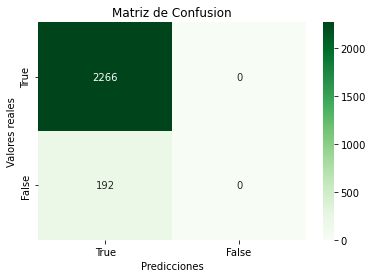

In [317]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm4,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz

## Quinta Vista Variables

In [318]:
dfVW_OrdenRealizadaCotizacion=pd.read_sql("select * from VW_OrdenRealizadaCotizacion", conexion)
dfVW_OrdenRealizadaCotizacion.head(5)

,ID_Categoria,ID_Parte,ProcesadoPor,IDAseguradora,OrdenRealizada
0,727,*220MISC,Aseguradora,438,False
1,769,*222MISC,Aseguradora,438,False
2,559,*223MISC,Aseguradora,880,False
3,207,*224MISC,Call center,880,False
4,1004,*225MISC,Aseguradora,1278,False


In [319]:
#x=dependientes
x5=dfVW_OrdenRealizadaCotizacion.iloc[:, 0:4].values
#y=independientes
y5=dfVW_OrdenRealizadaCotizacion.iloc[:,-1].values
#esto se vuelve un arreglo
x5

array([[727, '*220MISC', 'Aseguradora', 438],
       [769, '*222MISC', 'Aseguradora', 438],
       [559, '*223MISC', 'Aseguradora', 880],
       ...,
       [10616, 'ALY01626L85U1', 'Servicio de Integracion', 880],
       [10399, 'ALY01626R10-ORIG.REC', 'Servicio de Integracion', 1003],
       [8800, 'ALY01626R10U1-ORIG.REC', 'Servicio de Integracion', 200]],
      dtype=object)

In [320]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x5[:,0] = le.fit_transform(x5[:,0])
x5[:,1] = le.fit_transform(x5[:,1])
x5[:,2] = le.fit_transform(x5[:,2])
x5[:,3] = le.fit_transform(x5[:,3])
x5

array([[643, 0, 0, 57],
       [683, 1, 0, 57],
       [488, 2, 0, 113],
       ...,
       [9230, 12410, 3, 113],
       [9158, 12411, 3, 130],
       [8042, 12412, 3, 30]], dtype=object)

In [321]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5, test_size=0.20, random_state=0)

In [322]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train5,y_train5)

GaussianNB()

In [323]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred5 = classifier.predict(x_test5)
y_pred5

array([False, False, False, ..., False, False, False])

In [324]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm5 = confusion_matrix(y_test5, y_pred5) #crea la matriz de confucion 
ac = accuracy_score(y_test5,y_pred5) #define la presicion

In [325]:
#matriz de confusion
cm5

array([[1491,    0],
       [ 992,    0]], dtype=int64)

In [326]:
#matriz de confusion
cm5

array([[1491,    0],
       [ 992,    0]], dtype=int64)

## Sexta Vista

In [327]:
dfVW_OrdenRealizadaCotizacion=pd.read_sql("select * from VW_PorcentajeBajo", conexion)
dfVW_OrdenRealizadaCotizacion.head(5)

,ID_Parte,ID_Categoria,Nombre,PorcentajeBajo
0,AC1183100,1511,Spokane,0
1,AC2502112N,1831,Colorado,1
2,AC1200121,2080,Tulsa,1
3,222ADJUST,6,Memphis,1
4,AC1000148U-ORIG.REC,1235,Milwaukee,0


In [328]:
#x=dependientes
x6=dfVW_OrdenRealizadaCotizacion.iloc[:, 0:3].values
#y=independientes
y6=dfVW_OrdenRealizadaCotizacion.iloc[:,-1].values
#esto se vuelve un arreglo
x6

array([['AC1183100', 1511, 'Spokane'],
       ['AC2502112N', 1831, 'Colorado'],
       ['AC1200121', 2080, 'Tulsa'],
       ...,
       ['ABP1120', 1138, 'Tacoma'],
       ['ABP603007', 1531, 'Stockton'],
       ['ABP1531', 526, 'San Jose']], dtype=object)

In [329]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x6[:,0] = le.fit_transform(x6[:,0])
x6[:,1] = le.fit_transform(x6[:,1])
x6[:,2] = le.fit_transform(x6[:,2])
x6

array([[1043, 981, 82],
       [1632, 1199, 18],
       [1084, 1380, 91],
       ...,
       [176, 735, 87],
       [274, 995, 86],
       [196, 324, 78]], dtype=object)

In [330]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train6, x_test6, y_train6, y_test6 = train_test_split(x6,y6, test_size=0.20, random_state=0)

In [331]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train6,y_train6)

GaussianNB()

In [332]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred6 = classifier.predict(x_test6)
y_pred6

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [333]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm6 = confusion_matrix(y_test6, y_pred6) #crea la matriz de confucion 
ac6 = accuracy_score(y_test6,y_pred6) #define la presicion

In [334]:
#matriz de confusion
cm6

array([[   0, 1002],
       [   0, 1483]], dtype=int64)

In [335]:
#presicion
ac6

0.5967806841046278

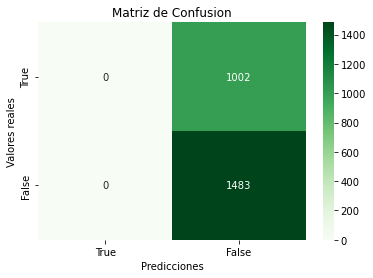

In [336]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm6,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz

## Semptima Vista

In [337]:
dfVW_VehiculoModerno=pd.read_sql("select * from VW_VehiculoModerno", conexion)
dfVW_VehiculoModerno.head(5)

,ID_Parte,ID_Categoria,Marca,VehiculoModerno
0,ACK014447,8413,GMC,1
1,ACK013971,9078,Ford,1
2,ACK012339,7330,Mazda,1
3,ACK011820R,6788,Chevrolet,1
4,ACK013043,9004,Toyota,1


In [338]:
#x=dependientes
x7=dfVW_VehiculoModerno.iloc[:, 0:3].values
#y=independientes
y7=dfVW_VehiculoModerno.iloc[:,-1].values
#esto se vuelve un arreglo
x7

array([['ACK014447', 8413, 'GMC'],
       ['ACK013971', 9078, 'Ford'],
       ['ACK012339', 7330, 'Mazda'],
       ...,
       ['AC2592109N', 4587, 'Jeep'],
       ['ACK014017', 5242, 'Audi'],
       ['ALTN13575-ORIG.REC', 8287, 'GMC']], dtype=object)

In [339]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x7[:,0] = le.fit_transform(x7[:,0])
x7[:,1] = le.fit_transform(x7[:,1])
x7[:,2] = le.fit_transform(x7[:,2])
x7

array([[8049, 7709, 23],
       [7721, 8291, 22],
       [6373, 6685, 42],
       ...,
       [3585, 4045, 32],
       [7752, 4662, 5],
       [10898, 7595, 23]], dtype=object)

In [340]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train7, x_test7, y_train7, y_test7 = train_test_split(x7,y7, test_size=0.20, random_state=0)

In [341]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train7,y_train7)

GaussianNB()

In [342]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred7 = classifier.predict(x_test7)
y_pred7

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [343]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm7 = confusion_matrix(y_test7, y_pred7) #crea la matriz de confucion 
ac7 = accuracy_score(y_test7,y_pred7) #define la presicion

In [344]:
#matriz de confusion
cm7

array([[   0,  893],
       [   0, 1632]], dtype=int64)

In [345]:
#presicion
ac7

0.6463366336633664

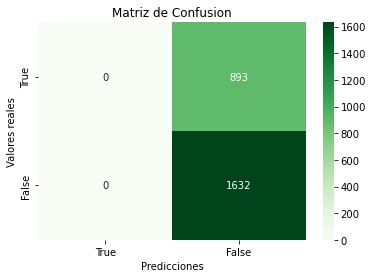

In [346]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm7,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz